<h2 style="text-align:center;"> DEVELOPMENT OF A JACCARD NATURAL LANGUAGE PROCESSING ALGORITHM FOR EFFECTIVE CLASSIFICATION OF SUSCEPTIBLE DUAL USE RESEARCH<br/></h2>

## 1. Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Dataset copy 2112023.csv', sep=',', encoding='latin')

## 2. Overview of Data

In [3]:
# Show the first 20 rows of the data
data.head(20)

Sentence Categorization
0                                            Dual-Use Research       Dual use
1                                                Cyber Threats       Dual use
2                                             Network Security   Non Dual use
3                                              Ethical Hacking   Non Dual use
4                                             Carbon Nanotubes       Dual use
5                                              Smart Materials       Dual use
6                                                 Super Alloys       Dual use
7                                        Aerospace Engineering       Dual use
8                                            Space Exploration       Dual use
9                                                 Aerodynamics   Non Dual use
10                                    Aeronautical Engineering       Dual use
11                              Avian influenza viruses (AIVs)       Dual use
12  Highly pathogenic avian influenza (HPAI) strains like H5N1       Dual use
13                               HPAI H5N1 infection in humans       Dual use
14                                                   HPAI H5N1       Dual use
15                                                       Virus   Non Dual use
16                                                   HPAI H5N1   Non Dual use
17                                         Spread of HPAI H5N1   Non Dual use
18                                         vaccine development   Non Dual use
19                                                pathogenesis   Non Dual use

In [4]:
# Get the number of rows and columns
n_rows = data.shape[0]
n_cols = data.shape[1]

In [5]:
print(f'The data has {n_rows} rows and {n_cols} columns')

The data has 545 rows and 2 columns


In [6]:
data['Categorization'].unique()

array(['Dual use', 'Non Dual use'], dtype=object)

In [7]:
data['Categorization'].value_counts()

Dual use        283
Non Dual use    262
Name: Categorization, dtype: int64

The dataset contains more than two unique categories. This is will be fixed in the <strong>Data Wrangling Section</strong>

In [8]:
# Check if there are duplicated data
data.duplicated().sum()

17

In [9]:
# Check for null values in the data
data[data.Categorization.isna()]

Empty DataFrame
Columns: [Sentence, Categorization]
Index: []

## 3. Data Wrangling

### 3.1. Drop Duplicated rows

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
# Confirm all duplicates have been dropped
data.duplicated().sum()

0

### 3.2. Drop null values (nans) 

In [12]:
data.dropna(inplace=True)

## 4. Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [14]:
target_count = data['Categorization'].value_counts(normalize=True)
target_count

Dual use        0.515152
Non Dual use    0.484848
Name: Categorization, dtype: float64

Dual-Use category constitute about <strong>41 percent</strong> 

In [15]:
fig = px.histogram(data, x='Categorization', title='Dual-Use vs Non Dual-Use')
fig.update_layout(title_x=0.5)

fig.show()

In [16]:
fig = px.pie(
    target_count, values=target_count.values, names=['Dual Use', 'Non Dual Use'],
    title='Proportion of Dual and Non-Dual Use',
)

fig.update_layout(legend_title_text='Categorization', title_x=0.3, title_y=0.95)

In [17]:
all_text = ' '.join(data['Sentence'])

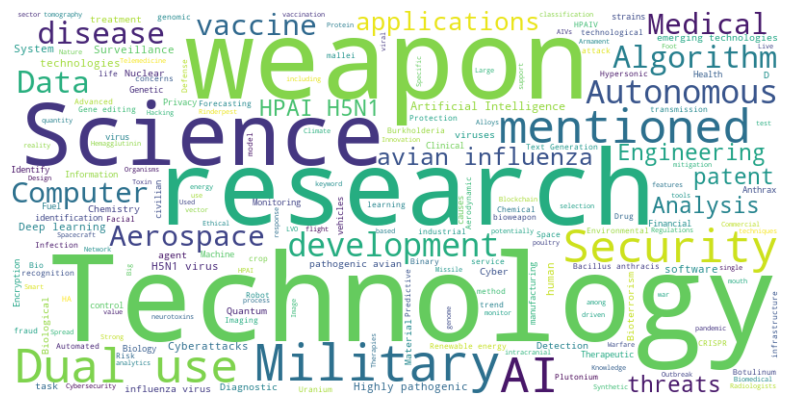

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5. Data Preparation and Preprocessing

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer

### 5.1. Perform Sentence Tokenization

In [20]:
cleaned_sentences = []

In [21]:
# Perform sentence tokenization
for i, category in enumerate(data.Sentence.values):
    token = word_tokenize(category)
    cleaned_sentences.append(token)
    if i == 0:
        print('Raw Statement:', end='\n')
        print(category, end='\n\n')
        print('Corresponding Tokenized Statement:')
        print(token, end='\n\n')

Raw Statement:
Dual-Use Research

Corresponding Tokenized Statement:
['Dual-Use', 'Research']



In [22]:
print(cleaned_sentences[:2])

[['Dual-Use', 'Research'], ['Cyber', 'Threats']]


### 5.2. Remove Punctuation and Convert all Words to Lowercase

In [23]:
for idx, sentence in enumerate(cleaned_sentences):
    temp_sentence = []
    for word in sentence:
        # Convert words in sentences to lowercase
        word = word.lower()
        # Add only alphanumeric words to output
        if word.isalnum():
            temp_sentence.append(word)
    
    # Add lowercase sentences free of punctuations back to cleaned_sentences
    cleaned_sentences[idx] = temp_sentence

### 5.3. Stopword Removal

In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
for idx, sentence in enumerate(cleaned_sentences):
    temp_sentence = []
    for word in sentence:
        # Remove all english stopwords
        if word not in stop_words:
            temp_sentence.append(word)
    # Add sentences free of stopwords back to cleaned_sentences
    cleaned_sentences[idx] = temp_sentence

### 5.4 Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
# Create an Instance of the lemmatizer class
lemmatizer = WordNetLemmatizer()

In [28]:
for idx, sentence in enumerate(cleaned_sentences):
    temp_sentence = []
    for word in sentence:
        # Perform word lemmatization
        word = lemmatizer.lemmatize(word)
        temp_sentence.append(word)
    # Add sentences with lemmatized words back to cleaned_sentences
    cleaned_sentences[idx] = temp_sentence

<h3>5.5. Add cleaned sentences back to the Dataframe</h3>

In [29]:
cleaned_sentences[:1]

[['research']]

In [30]:
for idx, sentence in enumerate(cleaned_sentences):
    sentence = ' '.join(sentence)
    cleaned_sentences[idx] = sentence

In [31]:
cleaned_sentences[:1]

['research']

In [32]:
# Add cleaned sentences back to the Dataframe
data['Sentence'] = cleaned_sentences

<h3>5.6. Split Data into Training and Test Set</h3>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
data['Categorization'] = data['Categorization'].map({'Dual use': 1, 'Non Dual use': 0})

In [35]:
X = data.drop(columns=['Categorization'])
y = data['Categorization']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(f'The shape of the training data is {X_train.shape}')
print(f'The shape of the test data is {X_test.shape}')

The shape of the training data is (422, 1)
The shape of the test data is (106, 1)


## 6. Machine Learning Models

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# Preprocessing: Convert text data into numerical representation
vectorizer = CountVectorizer()
vectorizer.fit(data['Sentence'])

CountVectorizer()

In [40]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [41]:
X_train = vectorizer.transform(X_train['Sentence'])
X_test = vectorizer.transform(X_test['Sentence'])

## 6.1. Define Helper Functions

In [42]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC score
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    return confusion_mat, accuracy, precision, recall, f1, fpr, tpr, auc_score

In [43]:
def metric_df(model, model_name):
    confusion_mat, *df, fpr, tpr, auc_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    confusion_matrices[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data=df, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    model_metrics.insert(0, 'Model', model_name)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    
    return model_metrics

### 6.2. Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
confusion_matrices = {}

In [46]:
models = [
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (SVC(kernel='linear', probability=True), 'Support Vector Machine'),
    (MultinomialNB(), 'Naive Bayes'),
    (XGBClassifier(), 'XGBoost'),
]

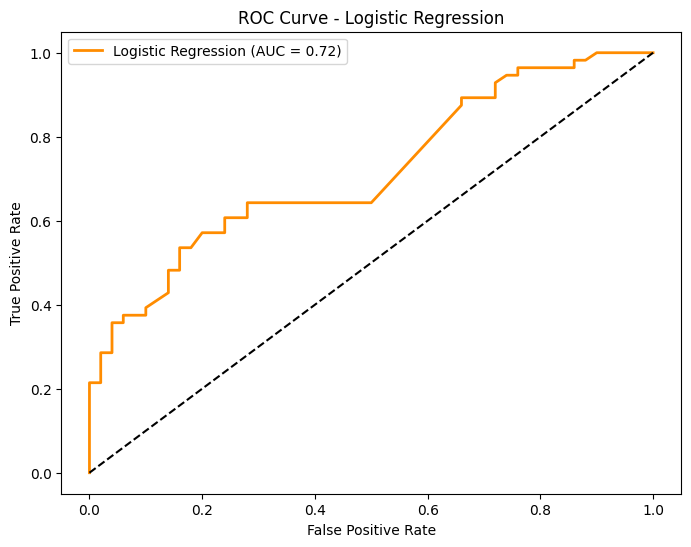

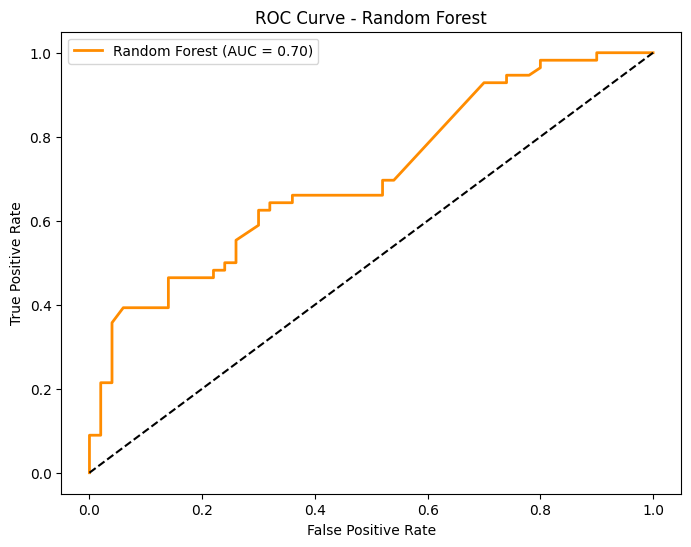

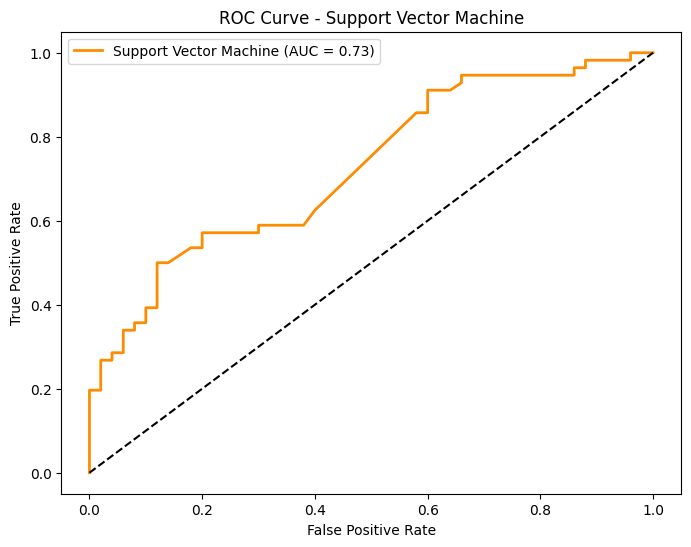

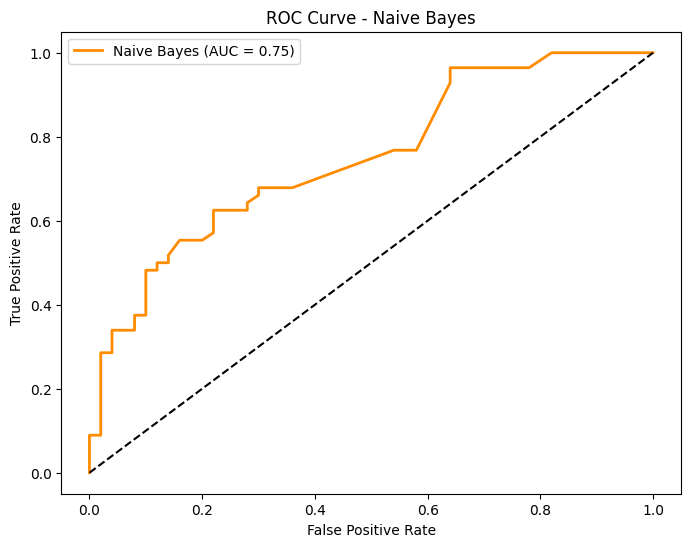

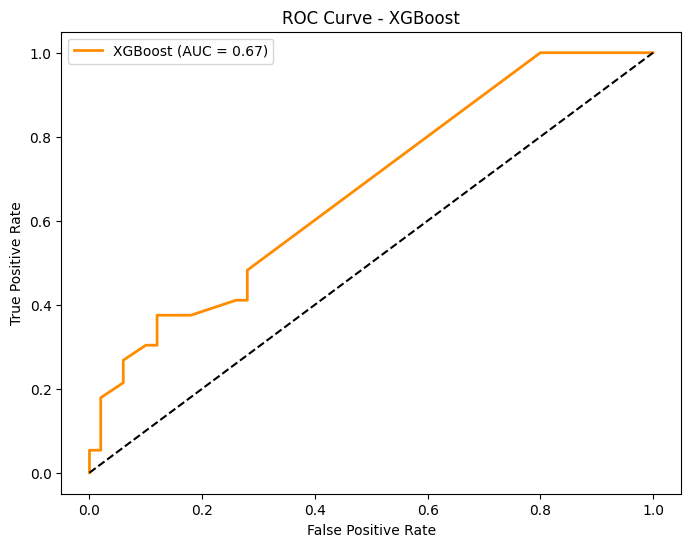

In [47]:
predictions = []

for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

### 6.3. Model Results

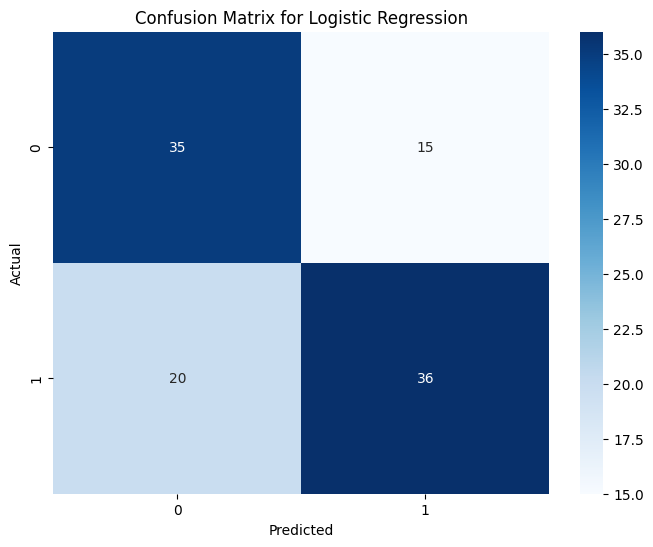

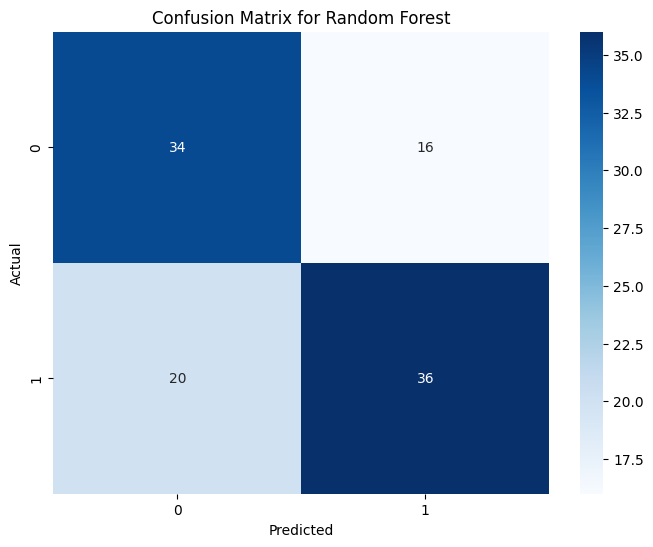

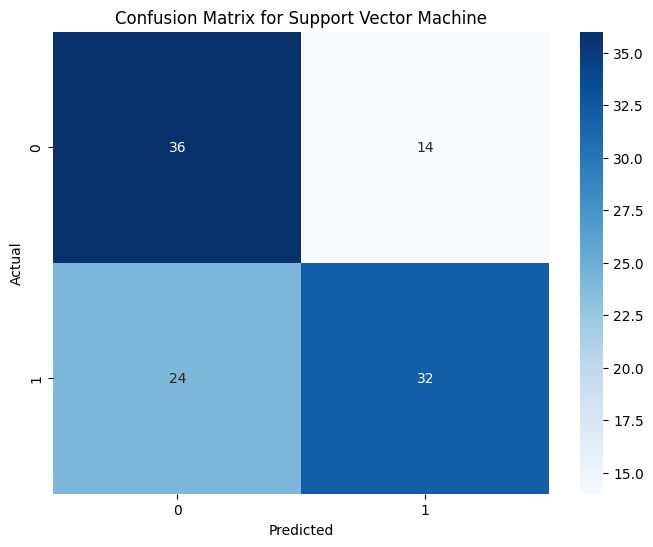

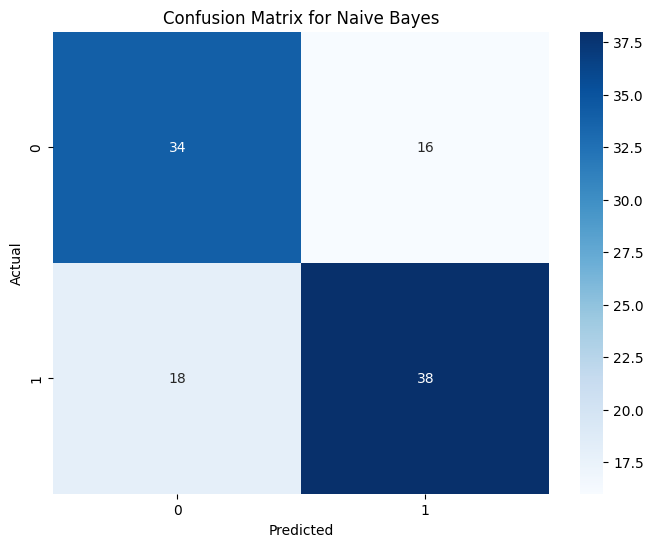

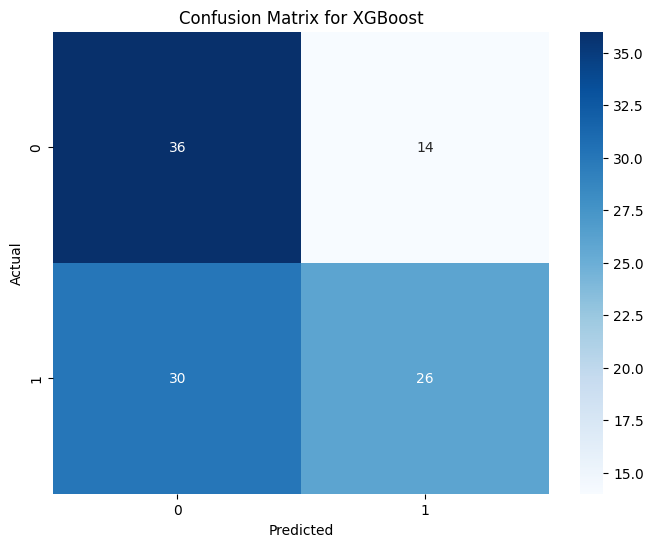

In [48]:
# Display confusion matrices
for model_name, confusion_mat in confusion_matrices.items():
    # Plot the confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [49]:
predictions_models = pd.concat(predictions, ignore_index=True, sort=False)

predictions_models

Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.669811   0.705882  0.642857  0.672897
1           Random Forest  0.660377   0.692308  0.642857  0.666667
2  Support Vector Machine  0.641509   0.695652  0.571429  0.627451
3             Naive Bayes  0.679245   0.703704  0.678571  0.690909
4                 XGBoost  0.584906   0.650000  0.464286  0.541667

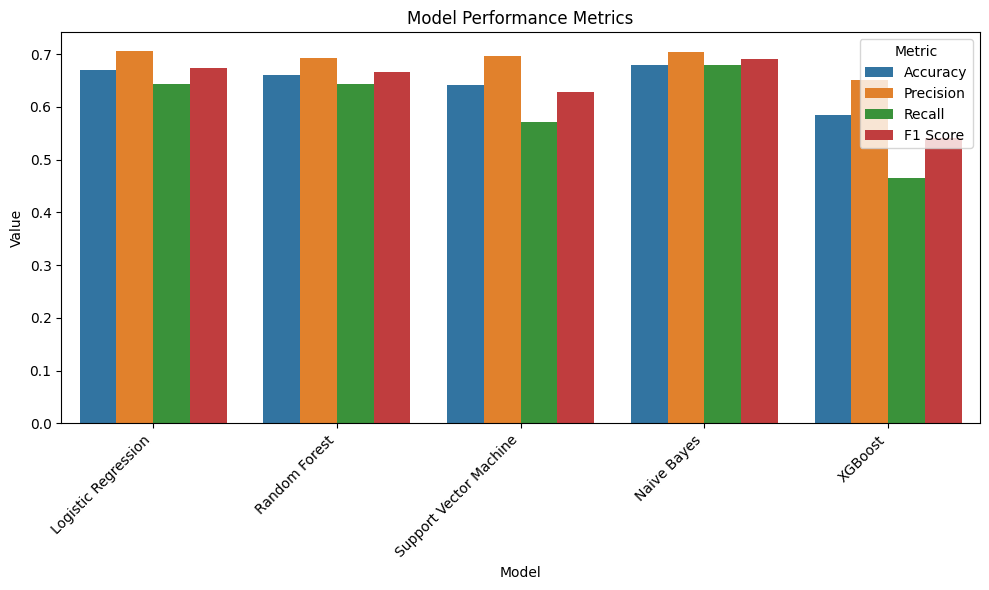

In [50]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=predictions_models.melt(id_vars='Model', var_name='Metric', value_name='Value'), x='Model', y='Value', hue='Metric')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Jaccard NLP Algorithm

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [52]:
def extract_dual_use_keywords():
    """Extract keywords of 'Dual Use' category
    """
    dual_use_keywords = set()
    
    dual_use_sentences = data.query("Categorization == 1").Sentence
    
    for sentence in dual_use_sentences:
        for keyword in sentence.split():
            if keyword not in dual_use_keywords:
                dual_use_keywords.add(keyword)
            
    return dual_use_keywords

In [53]:
def calculate_jaccard_similarity(str1, str2):
    """Calculate Jaccard similarity
    """
    similarity = len(str1.intersection(str2)) / len(str1.union(str2))
    
    return similarity 

In [54]:
dual_use_keywords = extract_dual_use_keywords()

# Print the first 10 dual use keywords
for count, keyword in enumerate(dual_use_keywords):
    if count == 5:
        break
    print(keyword)

designing
sensory
strong
transfer
classification


In [55]:
def categorize_test_data(dual_use_keywords):
    """Categorize the test data sentences and store the results for the test set
    """
    categorized_test_data = []

    for sentence in X_test_copy.Sentence:
        words = set(sentence.lower().split())
        jaccard_similarity = calculate_jaccard_similarity(dual_use_keywords, words)
        if jaccard_similarity > 0.001: 
            categorized_test_data.append(1)
        else:
            categorized_test_data.append(0)
            
    return categorized_test_data

In [56]:
categorized_test_data = categorize_test_data(dual_use_keywords)

In [57]:
def metrics(categorized_test_data):
    """Evaluate and return metrics 
    """
    # Calculate evaluation metrics
    confusion_mat = confusion_matrix(y_test, categorized_test_data)
    
    accuracy = accuracy_score(y_test, categorized_test_data)
    precision = precision_score(y_test, categorized_test_data)
    recall = recall_score(y_test, categorized_test_data)
    f1 = f1_score(y_test, categorized_test_data)
    
    # Calculate ROC AUC
    fpr, tpr, _ = roc_curve(y_test, categorized_test_data)
    roc_auc = roc_auc_score(y_test, categorized_test_data)
    
    return confusion_mat, accuracy, precision, recall, f1, fpr, tpr, roc_auc


In [58]:
confusion_mat, accuracy, precision, recall, f1, fpr, tpr, roc_auc = metrics(categorized_test_data)

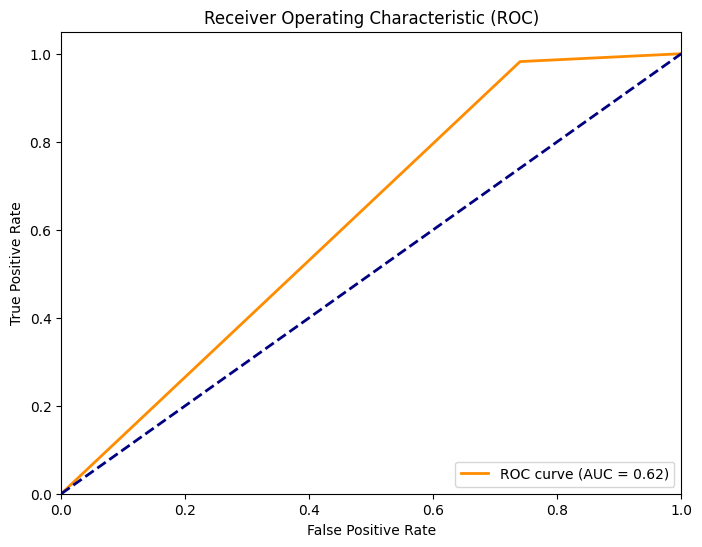

In [59]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

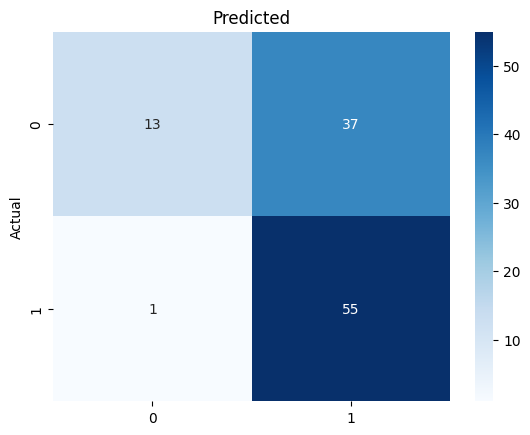

In [60]:
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Predicted')
plt.ylabel('Actual');

In [61]:
# Print evaluation metrics
print(f"Accuracy on Test Set: {accuracy:.2f}")
print(f"Precision on Test Set: {precision:.2f}")
print(f"Recall on Test Set: {recall:.2f}")
print(f"F1-score on Test Set: {f1:.2f}")

Accuracy on Test Set: 0.64
Precision on Test Set: 0.60
Recall on Test Set: 0.98
F1-score on Test Set: 0.74


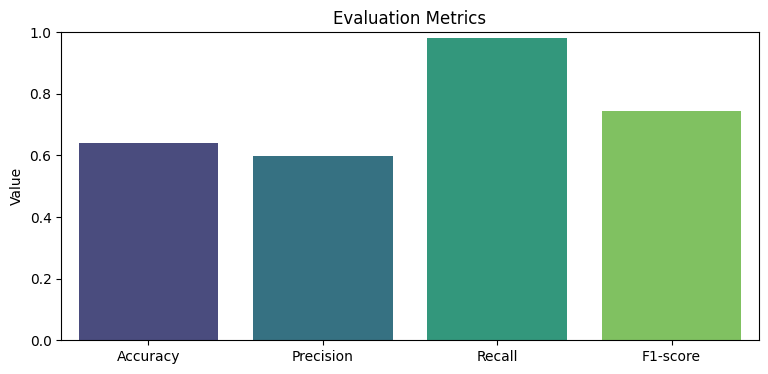

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and their values
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values = [accuracy, precision, recall, f1]

# Plotting the metrics
plt.figure(figsize=(9, 4))
sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Limiting y-axis to between 0 and 1 for better visualization
plt.show()



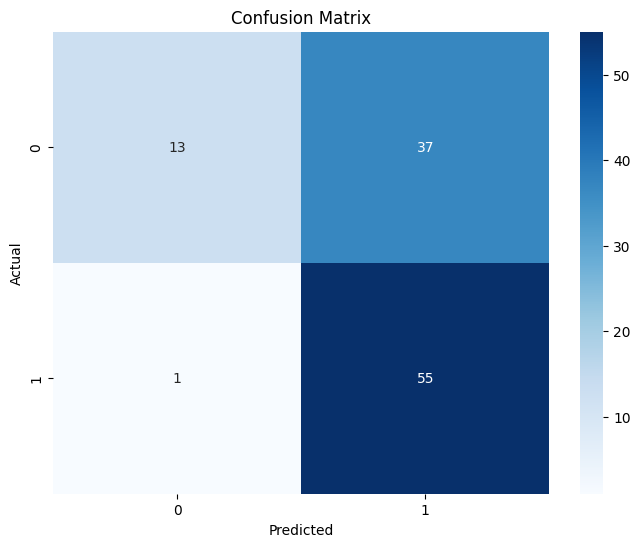

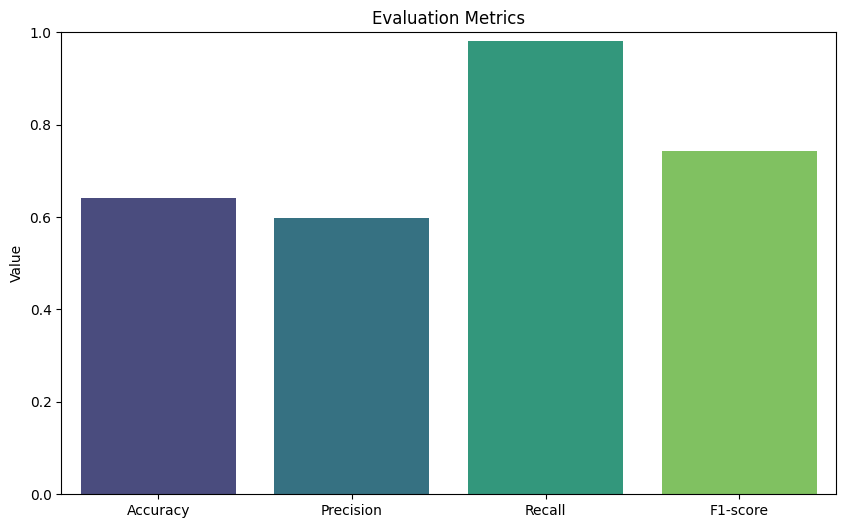

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the evaluation metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Limiting y-axis to between 0 and 1 for better visualization
plt.show()


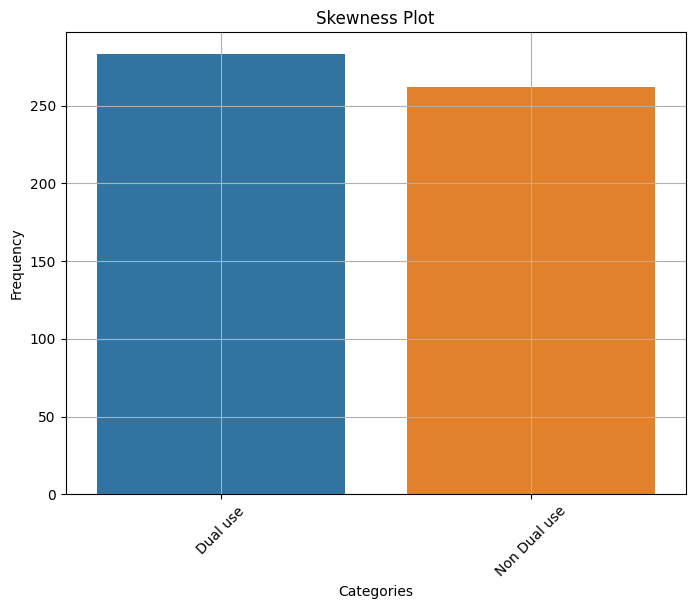

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Dataset copy 2112023.csv', sep=',', encoding='latin')

# Plot skewness
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Categorization')
plt.title('Skewness Plot')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()





In [65]:
data = pd.read_csv('Dataset copy 2112023.csv', sep=',', encoding='latin')

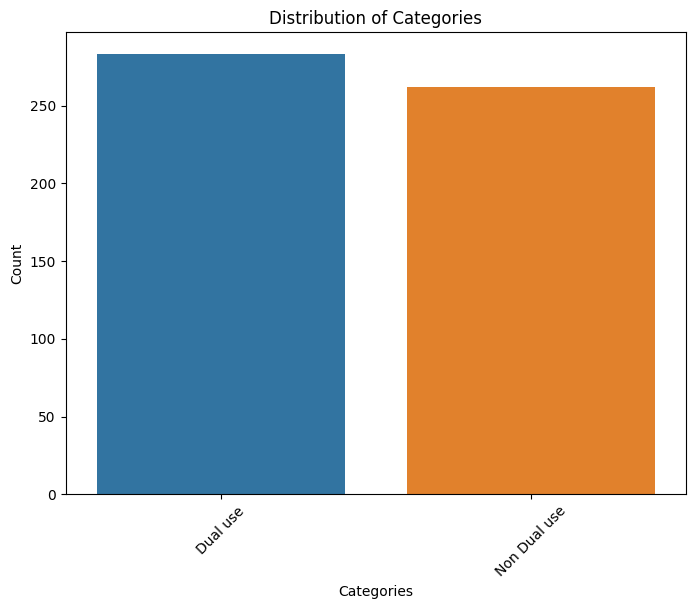

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Categorization' with the actual column name from your dataset
column_to_check = 'Categorization'

# Generate bar plot to visualize the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=column_to_check)
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [67]:
def predict_category(word, dual_use_keywords):
    """Predict the category of a single word
    """
    # Convert the word to lowercase
    word = word.lower()
    
    # Check if the word is in the set of dual-use keywords
    if word in dual_use_keywords:
        return 'Dual use'
    else:
        return 'Non Dual use'

# Example usage:
word_to_test = 'example_word'
predicted_category = predict_category(word_to_test, dual_use_keywords)
print(f"The predicted category for the word '{word_to_test}' is: {predicted_category}")


The predicted category for the word 'example_word' is: Non Dual use


In [68]:
def predict_category(word, dual_use_keywords):
    """Predict the category of a single word
    """
    # Convert the word to lowercase
    word = word.lower()
    
    # Check if the word is in the set of dual-use keywords
    if word in dual_use_keywords:
        return 'Dual use'
    else:
        return 'Non Dual use'

# Example usage:
word_to_test = 'virus'
predicted_category = predict_category(word_to_test, dual_use_keywords)
print(f"The predicted category for the word '{word_to_test}' is: {predicted_category}")


The predicted category for the word 'virus' is: Dual use


The predicted category for the word 'Development of car race system' is: Non Dual use


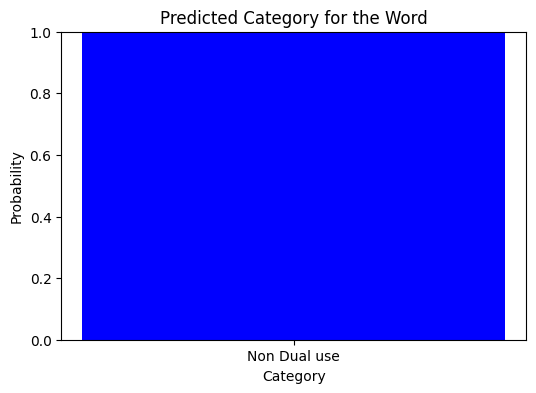

In [69]:
def predict_category(word, dual_use_keywords):
    """Predict the category of a single word
    """
    # Convert the word to lowercase
    word = word.lower()
    
    # Check if the word is in the set of dual-use keywords
    if word in dual_use_keywords:
        return 'Dual use'
    else:
        return 'Non Dual use'

# Example usage:
word_to_test = 'Development of car race system'
predicted_category = predict_category(word_to_test, dual_use_keywords)
print(f"The predicted category for the word '{word_to_test}' is: {predicted_category}")

# Plot the predicted category
plt.figure(figsize=(6, 4))
plt.bar(predicted_category, height=1, color=['blue', 'green'])  # Adjust colors as needed
plt.xlabel('Category')
plt.ylabel('Probability')
plt.title('Predicted Category for the Word')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()


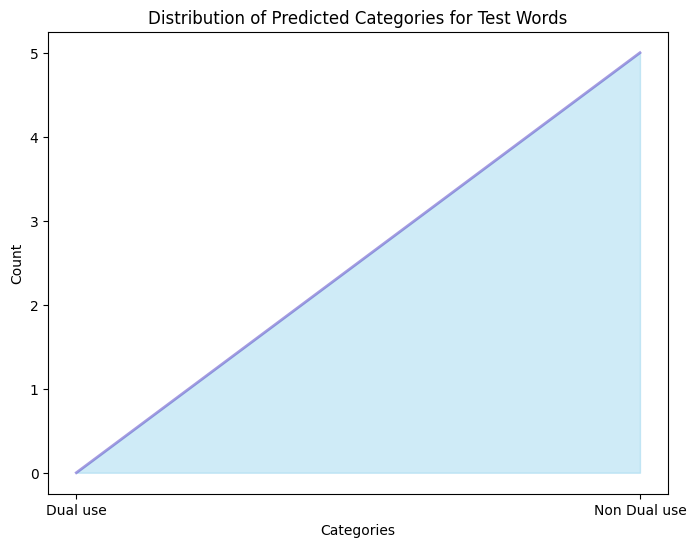

In [70]:
import matplotlib.pyplot as plt

def predict_category(word, dual_use_keywords):
    """Predict the category of a single word"""
    word = word.lower()
    if word in dual_use_keywords:
        return 'Dual use'
    else:
        return 'Non Dual use'

# Set of dual-use keywords (extracted using extract_dual_use_keywords function)
dual_use_keywords = {'keyword1', 'keyword2', 'keyword3', ...}

# List of words to test
words_to_test = ['word1', 'word2', 'word3', 'word4', 'word5']

# Predict the category for each word
predicted_categories = [predict_category(word, dual_use_keywords) for word in words_to_test]

# Count the occurrences of each category
category_counts = {'Dual use': predicted_categories.count('Dual use'),
                   'Non Dual use': predicted_categories.count('Non Dual use')}

# Plotting the area graph
categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(8, 6))
plt.fill_between(categories, counts, color='skyblue', alpha=0.4)
plt.plot(categories, counts, color='Slateblue', alpha=0.6, linewidth=2)

# Adding labels and title
plt.title('Distribution of Predicted Categories for Test Words')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show plot
plt.show()


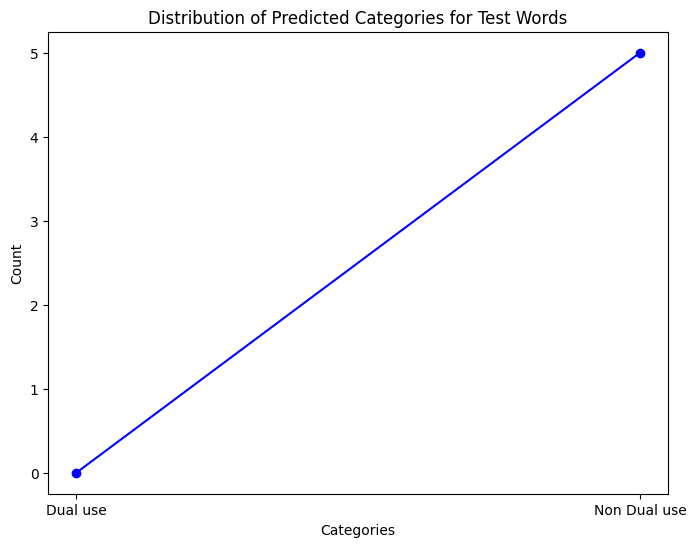

In [71]:
import matplotlib.pyplot as plt

def predict_category(word, dual_use_keywords):
    """Predict the category of a single word"""
    word = word.lower()
    if word in dual_use_keywords:
        return 'Dual use'
    else:
        return 'Non Dual use'

# Set of dual-use keywords (extracted using extract_dual_use_keywords function)
dual_use_keywords = {'keyword1', 'keyword2', 'keyword3', ...}

# List of words to test
words_to_test = ['word1', 'word2', 'word3', 'word4', 'word5']

# Predict the category for each word
predicted_categories = [predict_category(word, dual_use_keywords) for word in words_to_test]

# Count the occurrences of each category
category_counts = {'Dual use': predicted_categories.count('Dual use'),
                   'Non Dual use': predicted_categories.count('Non Dual use')}

# Extract categories and counts for plotting
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Plotting the line chart
plt.figure(figsize=(8, 6))
plt.plot(categories, counts, marker='o', color='b', linestyle='-')

# Adding labels and title
plt.title('Distribution of Predicted Categories for Test Words')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show plot
plt.show()


## 8. Final  Comparisions

In [72]:
df = [[accuracy, precision, recall, f1]]

In [73]:
jaccard_metrics = pd.DataFrame(data=df, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

jaccard_metrics.insert(0, 'Model', 'Jaccard Similarity')

In [74]:
predictions.append(jaccard_metrics)

In [75]:
predictions_all = pd.concat(predictions, ignore_index=True, sort=False)

predictions_all.sort_values(by=['F1 Score'], ascending=False).style.hide(axis='index')

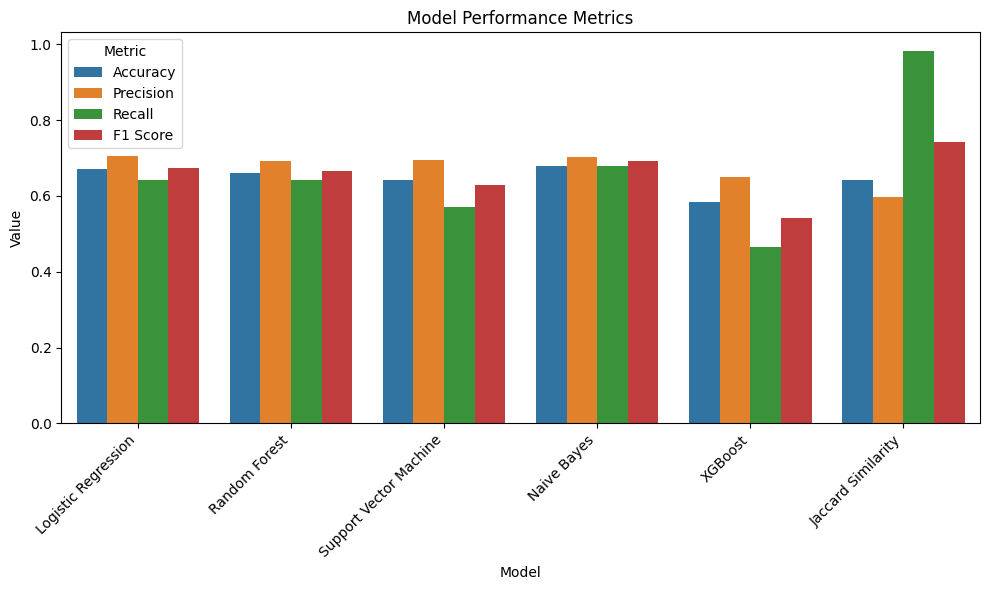

In [76]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=predictions_all.melt(id_vars='Model', var_name='Metric', value_name='Value'), x='Model', y='Value', hue='Metric')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()